In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist= datasets.fashion_mnist

In [3]:
(train_images, train_labels),(test_images,test_labels)= fashion_mnist.load_data()

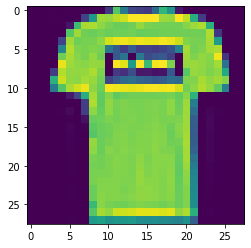

In [4]:
plt.imshow(train_images[1])

In [5]:
train_images= train_images/255.0
test_images= test_images/255.0

In [6]:
train_images[0].shape

(28, 28)

In [7]:
train_images= train_images.reshape(len(train_images),28,28,1)
test_images= test_images.reshape(len(test_images),28,28,1)

In [8]:
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28,1)),
        layers.Dense(20, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(train_images, train_labels , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9223 - accuracy: 0.6854
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5552 - accuracy: 0.8041
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4999 - accuracy: 0.8228
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4719 - accuracy: 0.8330
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4548 - accuracy: 0.8391
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4391 - accuracy: 0.8463
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4269 - accuracy: 0.8494
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4188 - accuracy: 0.8523
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4088 - accuracy: 0.8561
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.401

In [10]:
ann.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4516 - accuracy: 0.8413


[0.45157426595687866, 0.8413000106811523]

In [12]:
y_predicted= ann.predict(test_images)
y_predicted_labels= [np.argmax(i) for i in y_predicted]
cm= tf.math.confusion_matrix(labels= test_labels, predictions= y_predicted_labels)

In [13]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[821,   3,  20,  54,   2,   0,  91,   0,   8,   1],
       [  2, 957,   4,  31,   2,   0,   4,   0,   0,   0],
       [ 19,   3, 811,  13,  62,   1,  88,   0,   3,   0],
       [ 28,  10,  15, 890,  25,   0,  29,   0,   3,   0],
       [  0,   4, 213,  47, 631,   1,  97,   0,   7,   0],
       [  0,   0,   0,   2,   0, 902,   0,  62,   3,  31],
       [163,   1, 142,  42,  56,   1, 581,   0,  14,   0],
       [  0,   0,   0,   0,   0,  18,   0, 963,   0,  19],
       [  5,   1,  19,  12,   5,   6,  17,   8, 927,   0],
       [  0,   0,   0,   0,   0,   9,   1,  60,   0, 930]], dtype=int32)>